# Assignment 2
## Exercise 1

### Baskerball team model

This is an example of a basketball team. A basketball team has 5 variables: Grade(G), difficulty of games(D), Capacity(C), Performance(P) and rank(R).  
The grade is decided by the difficulty of games and capacity.  Performance of the team is decided by the capacity.  
There is a directed acyclic graph to show you the relationship of these 5 variables and the conditional probability.   

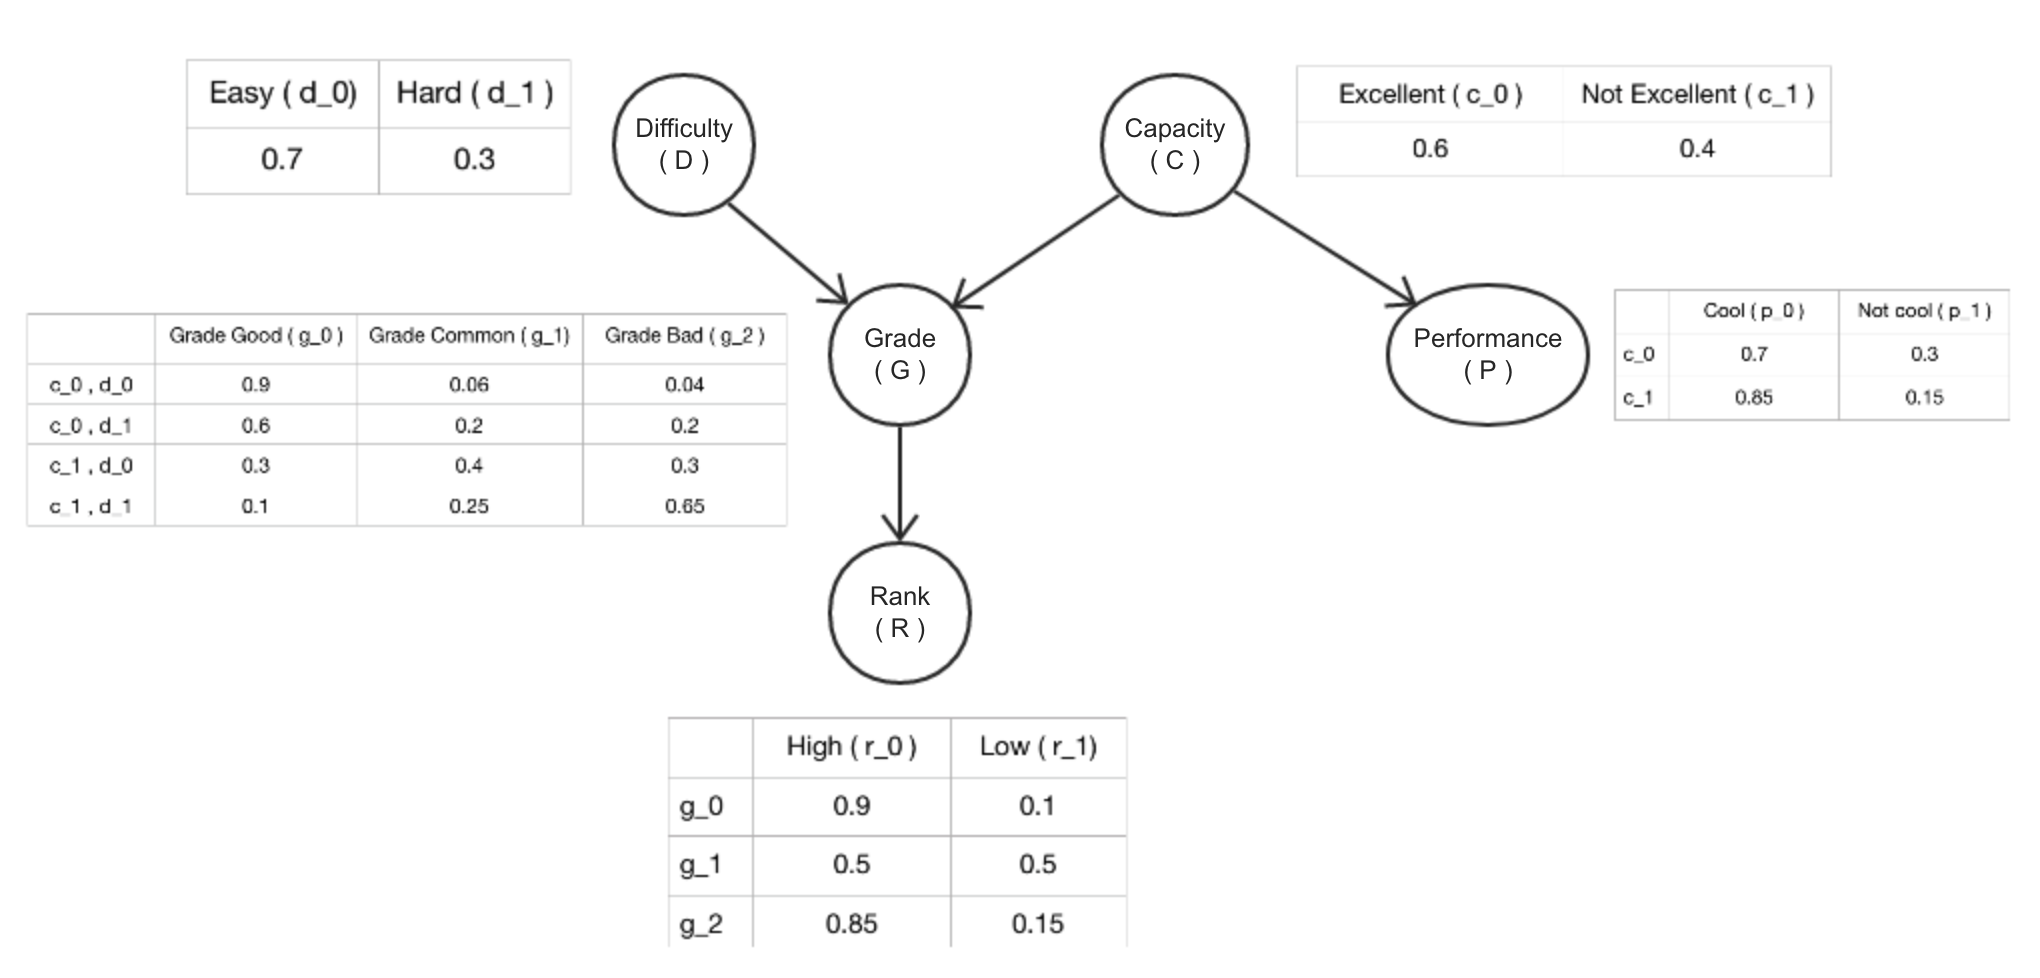

 What is p(c,r=0)?

#### (a) Build up Network

In [1]:
from pgmpy.models import BayesianModel as bysmodel
from pgmpy.factors.discrete import TabularCPD as tcpd

In [5]:
# define model with specifying connections between random variables
model = bysmodel([('d','g'), ('c','g'), ('g','r'), ('c','p')])

# define prior with TabularCPD (TABULAR Conditional Probability Distribution) without condition
priord = tcpd(variable='d', variable_card=2, values=[[0.7, 0.3]])
priorc = tcpd(variable='c', variable_card=2, values=[[0.6, 0.4]])

#define other probabilities
cpdg = tcpd(variable='g',variable_card=3, 
            evidence=['c','d'],evidence_card=[2, 2],
            values=[[0.9,0.6,0.3,0.1],
                    [0.06,0.2,0.4,0.25],
                    [0.04,0.2,0.3,0.65]])

cpdr = tcpd(variable='r',variable_card=2, 
            evidence=['g'],evidence_card=[3],
            values=[[0.9, 0.5, 0.85],
                    [0.1, 0.5, 0.15]])

cpdp = tcpd(variable='p',variable_card=2, 
            evidence=['c'],evidence_card=[2],
            values=[[0.7,0.85],
                    [0.3,0.15]])

# add probabilities to model
model.add_cpds(priord, priorc, cpdg, cpdr, cpdp)

True

In [6]:
# check structure and values consistency with Bayesian Model
model.check_model()

True

In [7]:
print(model.get_cpds('g'))

╒═════╤══════╤═════╤═════╤══════╕
│ c   │ c_0  │ c_0 │ c_1 │ c_1  │
├─────┼──────┼─────┼─────┼──────┤
│ d   │ d_0  │ d_1 │ d_0 │ d_1  │
├─────┼──────┼─────┼─────┼──────┤
│ g_0 │ 0.9  │ 0.6 │ 0.3 │ 0.1  │
├─────┼──────┼─────┼─────┼──────┤
│ g_1 │ 0.06 │ 0.2 │ 0.4 │ 0.25 │
├─────┼──────┼─────┼─────┼──────┤
│ g_2 │ 0.04 │ 0.2 │ 0.3 │ 0.65 │
╘═════╧══════╧═════╧═════╧══════╛


In [8]:
print(model.get_cpds('r'))

╒═════╤═════╤═════╤══════╕
│ g   │ g_0 │ g_1 │ g_2  │
├─────┼─────┼─────┼──────┤
│ r_0 │ 0.9 │ 0.5 │ 0.85 │
├─────┼─────┼─────┼──────┤
│ r_1 │ 0.1 │ 0.5 │ 0.15 │
╘═════╧═════╧═════╧══════╛


#### (b) Bayesian Inference

In theory:  
  
$$
\begin{align}
P(c|r=0) & = \sum_{d,g,p} P(d,c,g,p,r)\\
         & = \sum_{d,g,p} P(d)P(g|d,c)P(c)P(p|c)P(r|g)\\
         & = P(c)\sum_{d}P(g|d,c)\sum_{g}P(r|g)\\
         & = P(c)\sum_{g}\sum_{d}P(g|d,c) P(r|g))\\
         & = \dfrac{P(c)\sum_{g}\sum_{d}P(g|d,c) P(r|g)}{\sum_{c}P(c)\sum_{g}\sum_{d}P(g|d,c) P(r|g) P(c)}\\
         & = \dfrac{0.6\times [(0.7\times 0.9 + 0.3\times 0.6)\times 0.9+ (0.7\times 0.06 + 0.3\times 0.2)\times 0.5 + (0.7\times 0.04 + 0.3\times 0.2)\times 0.85]}{0.6\times [(0.7\times 0.9 + 0.3\times 0.6)\times 0.9+ (0.7\times 0.06 + 0.3\times 0.2)\times 0.5 + (0.7\times 0.04 + 0.3\times 0.2)\times 0.85] + 0.4\times [(0.7\times 0.3 + 0.3\times 0.1)\times 0.9+ (0.7\times 0.4 + 0.3\times 0.25)\times 0.5 + (0.7\times 0.3 + 0.3\times 0.65)\times 0.85]}\\
         & \approx 0.63476
\end{align}
$$         

Now, let's solve it with **pgmpy**:

In [11]:
from pgmpy.inference import VariableElimination as proc
infer = proc(model)
print(infer.query(['c'], evidence={'r' : 0}) ['c'])

╒═════╤══════════╕
│ c   │   phi(c) │
╞═════╪══════════╡
│ c_0 │   0.6348 │
├─────┼──────────┤
│ c_1 │   0.3652 │
╘═════╧══════════╛
